In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ls


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [0]:
!ls

drive  sample_data


In [0]:
!ls drive

'My Drive'


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks"

allimages.ipynb   galaxyclusters.ipynb	     intro.py	       vlass.ipynb
allimages.py	  GaussianFit.ipynb	     nvss.fits
dataimport.ipynb  GaussianFitStudents.ipynb  tensortest.ipynb
dss2blue.fits	  GitTest.ipynb		     VLASSimage.fits


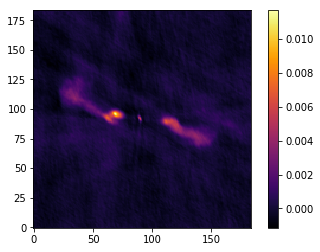

In [0]:
# Brian R. Kent, NRAO
# Loading and displaying a FITS image

# IMPORTS ----------------------------------
from astropy.io import fits
from astropy import wcs

import numpy as np
import matplotlib.pyplot as plt

# VARIABLES -------------------------------
RA =   ( 7.0 +17.0/60.0  +8.00/3600.0) * 15.0
DEC = -(36.0 +21.0/60.0 +58.75/3600.0)
HALF_Width = 92   #(92 pixels is approx. 1.5 arcminutes)
VLASS_FITS = '/content/drive/My Drive/Colab Notebooks/VLASSimage.fits'


#1 open VLASS File. This contains HEADER and DATA
hdulist = fits.open(VLASS_FITS)

#2 Use the VLASS FITS header data to create a world coordinate system(wcs)
w = wcs.WCS(hdulist[0].header)

#3 get all the raw data from the VLASS file
VLASS_image_data = fits.getdata(VLASS_FITS)[0,0,:,:]

#4 Put the coordinates into an Array for AstroPy
world = np.array([[RA, DEC, 0.0, 0.0]], np.float_)

#5 Use the WCS to convert from RA/DEC to pixel locations on the image
Pixel_Coord = w.wcs_world2pix(world,1)
x = int(round(Pixel_Coord[0][1]))
y = int(round(Pixel_Coord[0][0]))

#6 create 4 corners of cutout
lower_x = x - HALF_Width
upper_x = x + HALF_Width

lower_y = y - HALF_Width
upper_y = y + HALF_Width

#7 Use the pixel coordinates to make cutout
vlasscutout = VLASS_image_data[lower_x:upper_x,lower_y:upper_y]

#8 Plot onto graph with Matplotlib
plt.imshow(vlasscutout, origin='lower', cmap='inferno')
plt.colorbar()
plt.show()